In [72]:
import numpy as np
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
# from quimb import *
import time


In [11]:
def Hilbertspace_Zr(N,r):

    states=np.zeros((r**N,N),dtype=int)

    for i_1 in range(r**N):
        num_str=np.base_repr(i_1,base=r)[::-1]
        for i_2 in range(len(num_str)):
            states[i_1,i_2]=int(num_str[i_2])

    return states
# print( np.arange(int(r**(N-1)))  )
# print(states)

def p_transpose_2(V,Na,Nb):
# partial transpose with respect to subsystem 2
# the basis of NaxNb density matrix is defined by Nb*(i-1)+j,
# i,j=1,2,3 spans the Hilbert space of subsystem 1 and 2 respectively
    U=np.zeros((Na*Nb,Na*Nb), dtype=np.complex128)
    for i_1 in range(Na):
        for i_2 in range(Na):
#             print(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)].shape)
            U[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)]=np.transpose(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)])

    return U


In [406]:
Nrep=400
r=2 # local Hilbert space dim

Lab=8
Lc=8
L=Lab+Lc

Nc=r**Lc
Nab=r**Lab

neg=np.zeros(Nrep)
v1b=np.zeros((Nrep*Nab,int(Lab/2)))

t_timer=time.time()
# np.random.seed(1)

for i_r in range(Nrep):
    print(i_r, end='\r')
    #### no symmetry
    X=np.random.randn(Nab,Nc)+1j*np.random.randn(Nab,Nc)

    mat=np.dot(X,np.matrix(X).H)
    rho= mat / np.trace(mat)
    
    for i_n in range(int(Lab/2)):
#     for i_n in range(4):
        Na=r**(i_n+1)
        Nb=r**(Lab-i_n-1)
        rT2b = p_transpose_2(rho,Na,Nb)
        l1T=np.linalg.eigvalsh(rT2b)
        v1b[i_r*Nab:(i_r+1)*Nab,i_n] = (Nab)*l1T

elapsed = time.time() - t_timer
print("Finished, elapsed time = %.2f " % (elapsed)+ "sec")

Finished, elapsed time = 16.81 sec


In [ ]:
num_bins = 30

plt.figure()
# for i_n in range(int(Lab/2)):
for i_n in range(0,int(Lab/2)):
    n, bin_edges = np.histogram(v1b[:,i_n], bins=num_bins)

    bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
    n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])

    plt.plot(bins_center,n,'o-',markersize=2,label='Na=%d' % (i_n+1))

plt.legend()
plt.ylim(0,0.05)
plt.show()


In [71]:
Nrep=40
r=2 # local Hilbert space dim

Lab=12
# Lclist=np.array([4,5,6])
Lclist=np.arange(int(Lab/2),int(Lab/2)+3)

Nab=r**Lab

neg=np.ones((int(Lab/2)+1,len(Lclist),Nrep))
# v1b=np.zeros((Nrep*Nab,int(Lab/2)))

t_timer=time.time()
# np.random.seed(1)

for i_c in range(len(Lclist)):
    Lc=Lclist[i_c]
    Nc=r**Lc
    for i_r in range(Nrep):
        #### no symmetry
        X=np.random.randn(Nab,Nc)+1j*np.random.randn(Nab,Nc)

        mat=np.dot(X,np.matrix(X).H)
        rho= mat / np.trace(mat)

        for i_n in range(int(Lab/2)):
            Na=r**(i_n+1)
            Nb=r**(Lab-i_n-1)
            rT2b = p_transpose_2(rho,Na,Nb)
            l1T=np.linalg.eigvalsh(rT2b)
#             v1b[i_r*Nab:(i_r+1)*Nab,i_n] = (Nab)*l1T
            neg[i_n+1,i_c,i_r]= np.sum(np.abs(l1T))
    
elapsed = time.time() - t_timer
print("Finished, elapsed time = %.2f " % (elapsed)+ "sec")

Finished, elapsed time = 1995.78 sec


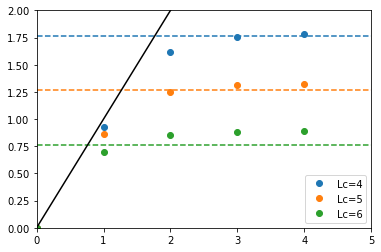

In [53]:
logneg_avg=np.log2(np.mean(neg,axis=2))
# neglog_avg=np.mean(np.log2(neg),axis=2)

plt.figure()
for i_c in range(len(Lclist)):
    Lc=Lclist[i_c]
    plt.plot(np.arange(0,5), logneg_avg[:,i_c], 'o',color='C%d' % (i_c),label='Lc=%d' % Lc)
    if Lc< Lab:
        plt.plot([0,int(Lab)/2+1],[(Lab-Lc)/2+np.log2(8/(3*pi))]*2,'--',color='C%d' % (i_c))
# plt.plot(np.arange(1,5), neglog_avg, 'x')

plt.plot([0,Lclist.max()],[0,Lclist.max()],'k')
plt.ylim(0,2)
plt.xlim(0,int(Lab)/2+1)
plt.legend()
plt.show()

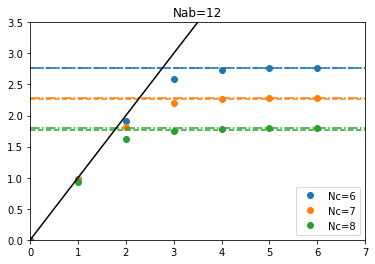

In [72]:
def fa(xs):
    ys= np.zeros(xs.shape)
    for i_x in range(len(xs)):
        x= xs[i_x]
        if x>1:
            ys[i_x]= np.real( np.log2(2/pi* np.arcsin(1/x)+2/(3*pi*x)*(1+2*x**2)* (1-1/x**2 +0.0j)**0.5 ) )
        else:
            ys[i_x]= 0
    return ys

at=2*r**((Lab-Lclist)/2)
yt=fa(at)


logneg_avg=np.log2(np.mean(neg,axis=2))
# neglog_avg=np.mean(np.log2(neg),axis=2)

plt.figure()
for i_c in range(len(Lclist)):
    Lc=Lclist[i_c]
    plt.plot(np.arange(0,int(Lab)/2+1), logneg_avg[:,i_c], 'o',color='C%d' % (i_c),label='Nc=%d' % Lc)
    if Lc< Lab:
        plt.plot([0,int(Lab)/2+1],(Lab-Lc)/2*np.array([1,1])+np.log2(8/(3*pi)),'--',color='C%d' % (i_c))
        plt.plot([0,int(Lab)/2+1],yt[i_c]*np.array([1,1]),'-.',color='C%d' % (i_c))
# plt.plot(np.arange(1,5), neglog_avg, 'x')

plt.title('Nab=%d' % (Lab))
plt.plot([0,Lclist.max()],[0,Lclist.max()],'k')
plt.ylim(0,3.5)
plt.xlim(0,int(Lab)/2+1)
plt.legend()
plt.show()

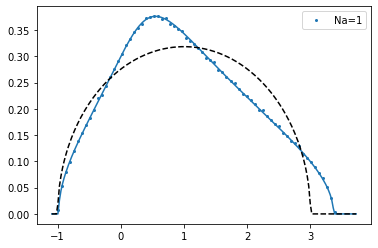

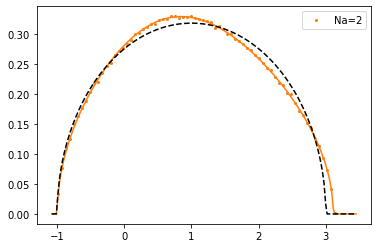

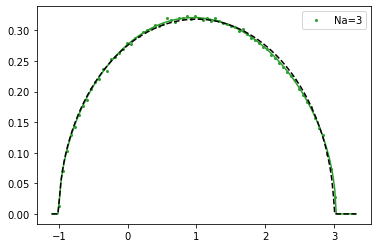

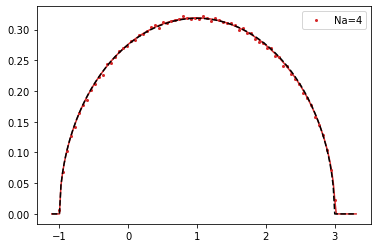

In [407]:
def Gz(z,a,b):
    zsq=  2 - 18*z**2 - 9*z*a - 6*b - 9*z**2*b + 9*z*a*b + 6*b**2 - 2*b**3 + (4*(3*z*(-z + a) - (-1 + b)**2)**3 + (2 - 18*z**2 - 9*z*a - 6*b - 9*z**2*b + 9*z*a*b + 6*b**2 - 2*b**3)**2)**0.5 
    ym= np.imag( -(-1 + b)/(3*z) + ((1 - 1j*sqrt(3))*(3*z*(-z + a) -(-1 + b)**2))/(3*2**(2/3)*z)/zsq**(1/3)  \
            -(1 + 1j*sqrt(3))/(6*2**(1/3)*z)*zsq**(1/3) )

    a2= (b-1)/z +1j*0
    a1= (a-z)/z +1j*0
    a0= 1/z +1j*0
    Q= (3*a1-a2**2)/9 +1j*0
    R= (9*a2*a1-27*a0-2*a2**3)/54 +1j*0
    D= Q**3 + R**2 +1j*0
    S= (R+D**0.5 +1j*0)**(1/3)
    T= (R-D**0.5 +1j*0)**(1/3)
#     print(D**0.5)
#     z1= -a2/3 + (S+T)
#     z2= -a2/3 - (S+T)/2+ 1j*sqrt(3)*(S-T)/2
#     z3= -a2/3 - (S+T)/2- 1j*sqrt(3)*(S-T)/2
    z4= -a2/3 + (1-1j*sqrt(3))*Q/S/2-(1+1j*sqrt(3))/2*S
    return np.imag(z4) #,z2,z3

def semicirc_dist(Q,x,x0):
    # my Q is from Ludwig's paper
    R= 2*sqrt(Q)
    fx= 2/(pi*R**2)*(R**2-(x-x0)**2+0j)**0.5
    return fx


for i_n in range(int(Lab/2)):
    plt.figure()
# for i_n in range(0,4):
# for i_n in [0]:
    Na=r**(i_n+1)
    Nb=r**(Lab-i_n-1)

    num_bins = 70

    n, bin_edges = np.histogram(v1b[:,i_n], bins=num_bins)

    bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
    n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])

    plt.plot(bins_center,n,'o',markersize=2,color='C%d' % (i_n),label='Na=%d' % (i_n+1) )

#     xplot=np.linspace(-1,1)*1.5+1j*0
    a = Nc/Nb +1j*0
    b = Nc/Nb*Na +1j*0

    fx =  Nb/Nc
    fy =  Nc/pi/Nb
    xplot= np.linspace(bins_center.min(),bins_center.max(),200)/fx*1.1 #+1j*1e-12
#     xplot=x0[np.where(x0>0)]
#     yplot=(Gz(xplot,a,b))
#     plt.plot( xplot*fx, yplot*fy,color='C%d' % (i_n),label='Na=%d' % (i_n+1) )
#     xplot_neg=x0[np.where(x0<0)]
#     yplot_neg=(Gz(xplot_neg,a,b))
#     plt.plot(xplot_neg*fx, -yplot_neg*fy,color='C%d' % (i_n))
    yplot=np.abs(Gz(xplot,a,b))
    plt.plot(xplot*fx,fy*yplot,color='C%d' % (i_n))

    fx_semi= semicirc_dist(Na*Nb/Nc,xplot*fx,1)
    plt.plot(xplot*fx,np.real(fx_semi),'k--')

#     if i_n==0 or i_n==1:
#         plt.ylim(-0.001,0.03)
#     else:
#         plt.ylim(-0.001,0.04)
    plt.legend()
plt.show()

/gscratch/home/hshapourian/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/gscratch/home/hshapourian/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/gscratch/home/hshapourian/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/gscratch/home/hshapourian/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/gscratch/home/hshapourian/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex val

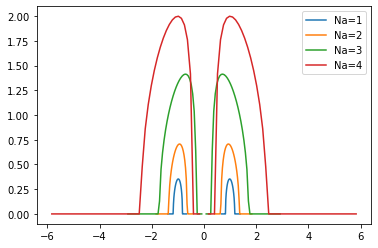

In [355]:
r=2 # local Hilbert space dim
Lab=10
Lc=3
Nc=r**Lc
# for i_n in range(int(Lab/2)):
for i_n in range(0,4):
    Na=r**(i_n+1)
    Nb=r**(Lab-i_n-1)
    alpha= Na*Nc/Nb
    l2= (1+sqrt(alpha))**2
    l1= (1-sqrt(alpha))**2
    xplot=np.linspace(l1,l2)+1j*0
    yplot= ((xplot**2-l1)*(l2-xplot**2))**0.5/xplot 
    fx = 1# Nb/Nc
    fy = 1# 1/Nb # Nb*Nc*Na
    plt.plot( xplot*fx+0, yplot*fy,color='C%d' % (i_n),label='Na=%d' % (i_n+1) )
    plt.plot(-xplot*fx+0, yplot*fy,color='C%d' % (i_n))

#     num_bins = 30

#     n, bin_edges = np.histogram(v1b[:,i_n], bins=num_bins)

#     bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
#     n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])

#     plt.plot(bins_center,n,'o',markersize=2,color='C%d' % (i_n))

plt.legend()
# plt.ylim(0,0.02)
plt.show()